In [14]:
#""" Defining the libraries """
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,GlobalAveragePooling2D, Conv2D, AveragePooling2D, Flatten, Dense,Activation,MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image

# Setting Up Data Generators for Emotion Recognition Model Training

In [3]:
emotions_dir = '../input/deeplearning/augmented/all_data/' 
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    emotions_dir, target_size=image_size,
    batch_size=batch_size, 
    class_mode='categorical', shuffle=True, subset='training')

validation_generator = train_datagen.flow_from_directory(
    emotions_dir, target_size=image_size,
    batch_size=batch_size, 
    class_mode='categorical', shuffle=True, subset='validation')

Found 28475 images belonging to 6 classes.
Found 7115 images belonging to 6 classes.


# Visualizing Training Images with Emotion Labels

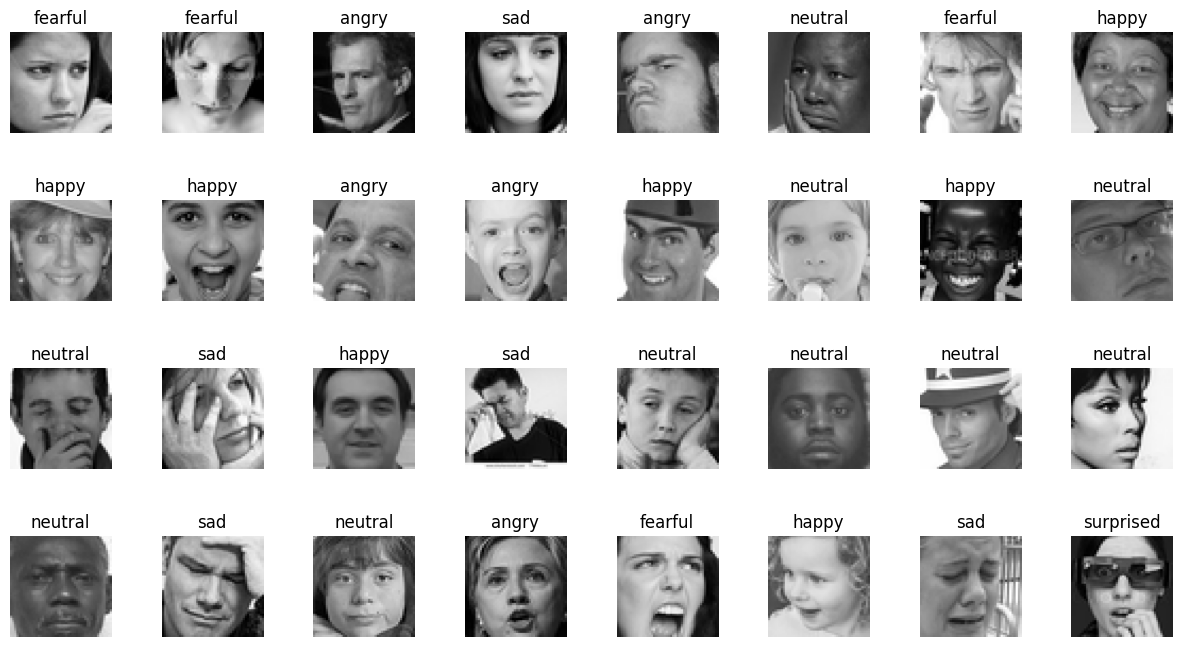

In [4]:
x_batch, y_batch = next(train_generator)
emotion_labels = list(train_generator.class_indices.keys())
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.ravel()

for i in np.arange(0, 4*8):
    axes[i].imshow(x_batch[i])
    axes[i].axis('off')
    emotion_idx = np.argmax(y_batch[i])
    axes[i].set_title(emotion_labels[emotion_idx])

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Split the data into training and validation sets

In [5]:
num_classes = len(emotions)
num_classes 

6

In [6]:
# Split the data into training and validation sets
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_generator[0][0], 
    train_generator[0][1], 
    test_size=0.2, 
    random_state=13
)

# Preparing Image and Label Data for Neural Network Training

In [7]:
# Convert the images and labels to numpy arrays
train_images = train_images.astype('float32')
validation_images = validation_images.astype('float32')
train_labels = to_categorical(train_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)

In [8]:
# Displaying the Dimensions of Training and Validation Datasets
print(f"Training Images Shape: {train_images.shape}")
print(f"Training Labels Shape: {train_labels.shape}")
print(f"Validation Images Shape: {validation_images.shape}")
print(f"Validation Labels Shape: {validation_labels.shape}")

Training Images Shape: (25, 224, 224, 3)
Training Labels Shape: (25, 6, 6)
Validation Images Shape: (7, 224, 224, 3)
Validation Labels Shape: (7, 6, 6)


# Model 1: Emotion Detection using basic Alexnet Architecture

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    88,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,852,678 (338.95 MB)

 Trainable params: 88,852,678 (338.95 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
model = model.fit(
            train_generator,
            epochs=20,
            validation_data=validation_generator)

Epoch 1/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 136s 152ms/step - accuracy: 0.2516 - loss: 1.7608 - val_accuracy: 0.2541 - val_loss: 1.7590
Epoch 2/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 137s 153ms/step - accuracy: 0.2530 - loss: 1.7588 - val_accuracy: 0.2541 - val_loss: 1.7588
Epoch 3/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.2558 - loss: 1.7713 - val_accuracy: 0.2541 - val_loss: 1.7582
Epoch 4/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.2565 - loss: 1.7576 - val_accuracy: 0.2541 - val_loss: 1.7588
Epoch 5/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.2495 - loss: 1.7617 - val_accuracy: 0.2541 - val_loss: 1.7589
Epoch 6/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 133s 149ms/step - accuracy: 0.2562 - loss: 1.7589 - val_accuracy: 0.2541 - val_loss: 1.7588
Epoch 7/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.2512 - loss: 1.7606 - val_accuracy: 0.2541 - val_loss: 1.7589
Epoch 8/20
890/890 ━━━━━━━━━━━━━━━━━━━━ 133s 149ms/step - accuracy: 0.2541 -

# Model 2: Emotion Detection using Alexnet Architecture + Data Augmentation + BatchNormalization

In [39]:
emotions_dir = '../input/deeplearning/augmented/all_data/' 
batch_size = 32
image_size = (224, 224)

# Applying Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    emotions_dir, target_size=image_size,
    batch_size=batch_size, 
    class_mode='categorical', shuffle=True, subset='training')

validation_generator = train_datagen.flow_from_directory(
    emotions_dir, target_size=image_size,
    batch_size=batch_size, 
    class_mode='categorical', shuffle=True, subset='validation')

Found 28475 images belonging to 6 classes.
Found 7115 images belonging to 6 classes.


In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [42]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 108, 108, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    88,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,857,414 (338.96 MB)

 Trainable params: 88,855,046 (338.96 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [48]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 358s 400ms/step - accuracy: 0.5637 - loss: 1.1452 - val_accuracy: 0.5130 - val_loss: 1.2575
Epoch 2/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 362s 404ms/step - accuracy: 0.5589 - loss: 1.1515 - val_accuracy: 0.5006 - val_loss: 1.3117
Epoch 3/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 362s 404ms/step - accuracy: 0.5611 - loss: 1.1478 - val_accuracy: 0.5275 - val_loss: 1.2168
Epoch 4/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 366s 408ms/step - accuracy: 0.5831 - loss: 1.0843 - val_accuracy: 0.5105 - val_loss: 1.2680
Epoch 5/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 366s 409ms/step - accuracy: 0.5666 - loss: 1.1268 - val_accuracy: 0.5337 - val_loss: 1.2727
Epoch 6/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 363s 405ms/step - accuracy: 0.5936 - loss: 1.0549 - val_accuracy: 0.4578 - val_loss: 1.4411
Epoch 7/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 362s 404ms/step - accuracy: 0.5992 - loss: 1.0595 - val_accuracy: 0.5254 - val_loss: 1.3189
Epoch 8/10
890/890 ━━━━━━━━━━━━━━━━━━━━ 360s 402ms/step - accuracy: 0.6088 -

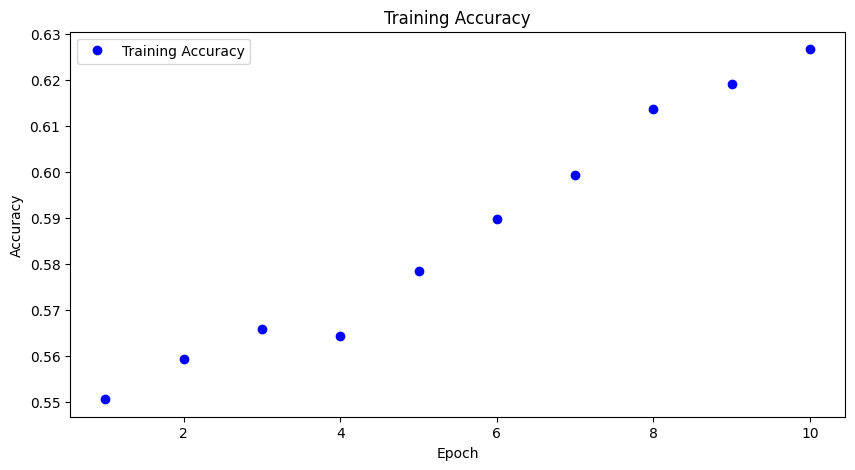

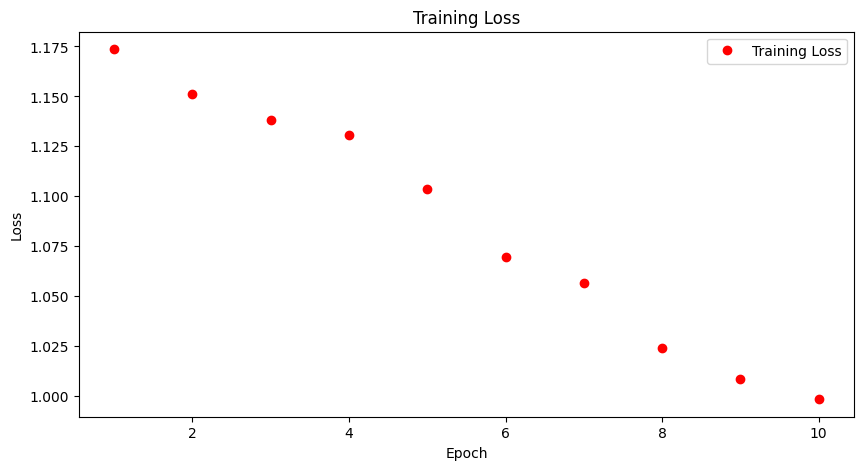

In [56]:
# Your existing data variables
accuracy = history.history["accuracy"]
loss = history.history["loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plotting Training Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, "ro", label="Training Loss")  # Changed color to red with 'ro'
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Predict ramdom Images Using Best Model: Model 2

In [57]:
class_indices = train_generator.class_indices
class_names = dict((v, k) for k, v in class_indices.items())
class_names

{0: 'angry', 1: 'fearful', 2: 'happy', 3: 'neutral', 4: 'sad', 5: 'surprised'}

# Predict emotion from a randomly loaded image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.02515126 0.11730162 0.02066358 0.10659946 0.6546058  0.07567818]]
Predicted class: 4


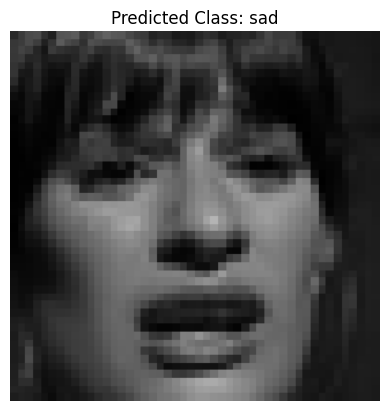

In [59]:
# We use best model and train set from another dataset to predict emotions
uploaded_image_path = '../input/emotion-detection-fer/test/sad/im102.png' 

img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0 

predictions = model.predict(img_array)
print(predictions)

predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)

predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()


# Predicting emotions using test subset from another dataset 

In [60]:
test_dir =  '../input/emotion-detection-fer/test/' 

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=image_size, 
    batch_size=batch_size, 
    class_mode='categorical', shuffle=False)

Found 7178 images belonging to 7 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


W0000 00:00:1711318661.956379     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


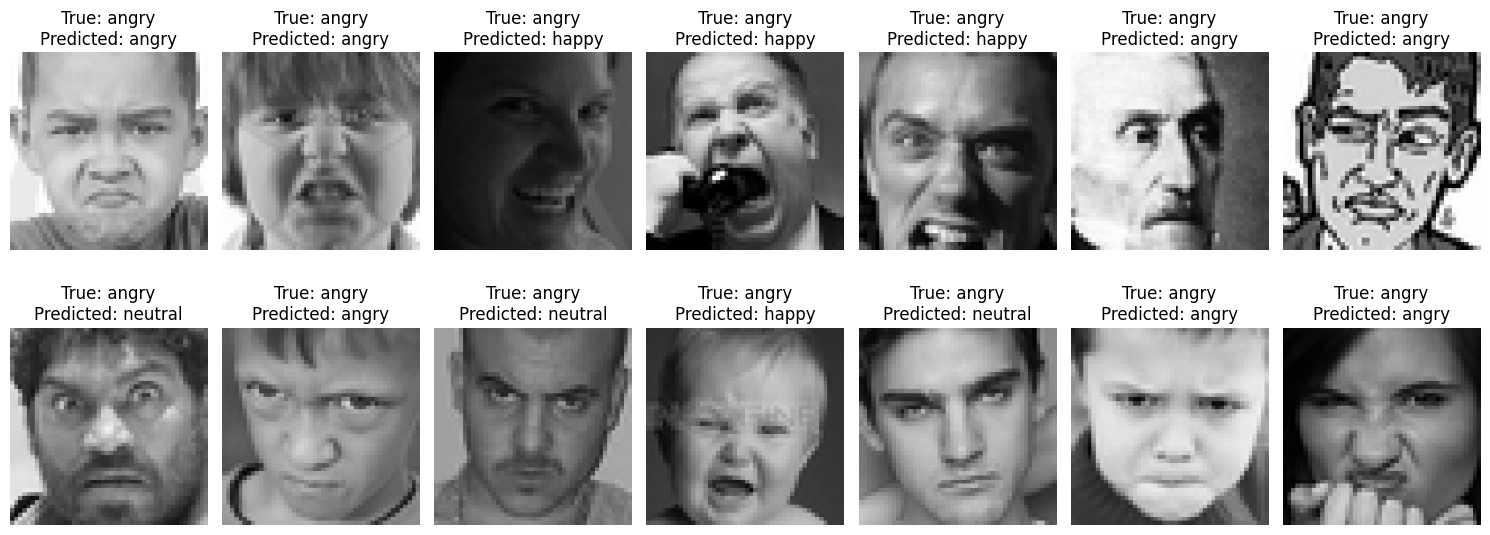

In [62]:
test_images = test_generator[0][0]
test_labels = test_generator[0][1]
predicted_labels = model.predict(test_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

class_labels = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

num_images = 14
random_indices = np.random.choice(len(test_images), size=num_images, replace=False)

fig, axes = plt.subplots(2, 7, figsize=(15, 6))

for i, index in enumerate(random_indices):
    img = test_images[index]
    label = class_labels[np.argmax(test_labels[index])]
    predicted_label = class_labels[predicted_classes[index]]
    
    row = i // 7
    col = i % 7
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'True: {label}\nPredicted: {predicted_label}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Saving Best Model

In [67]:
model.save('path_to_my_model_alexnet.h5') 